### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
dataset = pd.read_csv('15_Mall_Customers.csv');
x = dataset.iloc[:,[3,4]].values;
pd.DataFrame(dataset)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Elbow method for finding optimal no of clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

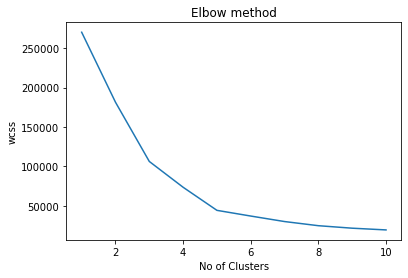

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show

# we get 5 as optimal number of clusters as from that the graph values decreases slowly

### Training K means clustering model over dataset

In [7]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)
y_pred = kmeans.fit_predict(x)
print(y_pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### Visualising Cluster

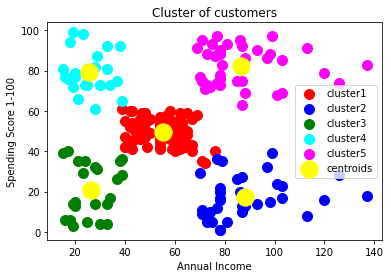

In [10]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c='magenta',label='cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score 1-100")
plt.title("Cluster of customers")
plt.legend()
plt.show()